<a href="https://colab.research.google.com/github/witaastika/UAS-Analitika-Data_Wita-Astika-Noveza/blob/main/Forecasting_%26_Clustering_Wita_Astika_Noveza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Time Series**

A time-series is a series of data points indexed in time order and it is used to predict the future based on the previous observed values. Time series are very frequently plotted via line charts. Time series are used in statistics , weather forecasting, stock price prediction, pattern recognititon, earthquake prediction, e.t.c.

Time series analysis comprises methods for analysing time series data in order to extract meaningful statistics and other characteristics of the data.

Time series forecasting is the use of a model to predict future values based on previously observed values.

**Import Library**

(Baris 1) berfungsi untuk manipulasi dan analisis data. (Baris 2) berfungsi untuk operasi matematika dan manipulasi array. (Baris 3) berfungsi untuk membuat visualisasi grafik dan plot.
(Baris 4) berfungsi untuk membuat visualisasi data lebih menarik dan informatif.
(Baris 5) berfungsi untuk mengimpor modul math yang menyediakan fungsi matematika dasar.
(Baris 6) berfungsi untuk mengimpor datetime yang digunakan untuk manipulasi tanggal dan waktu.
(Baris 7) berfungsi untuk menampilkan visualisasi secara langsung di dalam notebook, sehingga grafik dan plot akan ditampilkan di dalam output notebook.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime
%matplotlib inline

**Import Dataset**

Dataset source : https://www.kaggle.com/datasets/gunhee/amdgoogle?select=GOOGL.csv

In [ ]:
# https://drive.google.com/file/d/13SNAb5FT0WnboOnQa43Bb8OTH7OxiHRw/view?usp=sharing

!gdown 13SNAb5FT0WnboOnQa43Bb8OTH7OxiHRw

Downloading...
From: https://drive.google.com/uc?id=13SNAb5FT0WnboOnQa43Bb8OTH7OxiHRw
To: /content/silver.csv
100% 261k/261k [00:00<00:00, 129MB/s]


Syntax di bawah ini digunakan untuk membaca file csv dengan nama "silver.csv" dan menyimpannya ke dalam variabel "train_data". Data dari file csv tersbut dimuat ke dalam DataFrame. Kemudian, menampilkan 5 baris teratas pada DataFrame tersebut.

In [ ]:
train_data = pd.read_csv('silver.csv')
train_data.head()

,Date,Open,High,Low,Close,Volume,Currency
0,2000-01-04,5.420,5.420,5.32,5.375,27560,USD
1,2000-01-05,5.375,5.380,5.16,5.210,13515,USD
2,2000-01-06,5.205,5.215,5.15,5.167,4729,USD
3,2000-01-07,5.170,5.215,5.15,5.195,5375,USD
4,2000-01-10,5.190,5.230,5.17,5.190,4278,USD


Check missing values

Syntax dibawah ini berfungsi untuk mendeteksi missing value atau null dalam setiap kolom. Pada DataFrame di bawah ini diperoleh tidak adanya missing value atau non-null.

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5708 entries, 0 to 5707
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      5708 non-null   object 
 1   Open      5708 non-null   float64
 2   High      5708 non-null   float64
 3   Low       5708 non-null   float64
 4   Close     5708 non-null   float64
 5   Volume    5708 non-null   int64  
 6   Currency  5708 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 312.3+ KB


Check statistic vales for every features

Syntax di bawah ini berfungsi untuk menampilkan ringkasan statistik deskriptif dari DataFrame 'train_data' dari setiap kolom numerik pada DataFrame 'train_data'. Data numerik pada DataFrame ini berupa bilangan bulat (integer) dan bilangan desimal (float).

In [ ]:
train_data.describe()

,Open,High,Low,Close,Volume
count,5708.000000,5708.000000,5708.000000,5708.000000,5708.000000
mean,15.913846,16.132912,15.671124,15.905674,42003.550981
std,8.503551,8.642820,8.336264,8.492578,32912.765504
min,4.020000,4.050000,4.015000,4.028000,0.000000
25%,7.648750,7.758750,7.565000,7.647500,16191.000000
50%,16.032500,16.227500,15.815000,16.048000,35335.500000
75%,19.865000,20.140000,19.620000,19.847250,59418.750000
max,48.490000,49.820000,47.550000,48.599000,355275.000000


Handle datetime data for time series

(Baris 1) Syntax ini berfungsi untuk mengubah kolom 'Date' dalam DataFrame 'train_data' menjadi tipe data waktu 'datetime' untuk melakukan analisis berdasarkan data waktu.
(Baris 2) Syntax di bawah ini berfungsi untuk menjadikan kolom 'Date' menjadi indeks dalam DataFrame 'train_data'.
(Baris 3) Syntax di bawah ini berfungsi untuk menampilkan 5 baris teratas dalam DataFrame 'train_data'.

In [ ]:
train_data['Date'] = pd.to_datetime(train_data['Date'])
train_data.set_index('Date', inplace=True)
train_data.head()

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2000-01-04,5.420,5.420,5.32,5.375,27560,USD
2000-01-05,5.375,5.380,5.16,5.210,13515,USD
2000-01-06,5.205,5.215,5.15,5.167,4729,USD
2000-01-07,5.170,5.215,5.15,5.195,5375,USD
2000-01-10,5.190,5.230,5.17,5.190,4278,USD


**EXPLORATORY DATA ANALYSIS**

Now let’s visualise the Close (Stock Price when market closed)

Berikut ini merupakan hasil visualisasi data dari harga silver saat pemasaran ditutup pada 20 tahun terakhir di mana diperoleh fluktuasi naik dan turun atau stasioner dalam data.

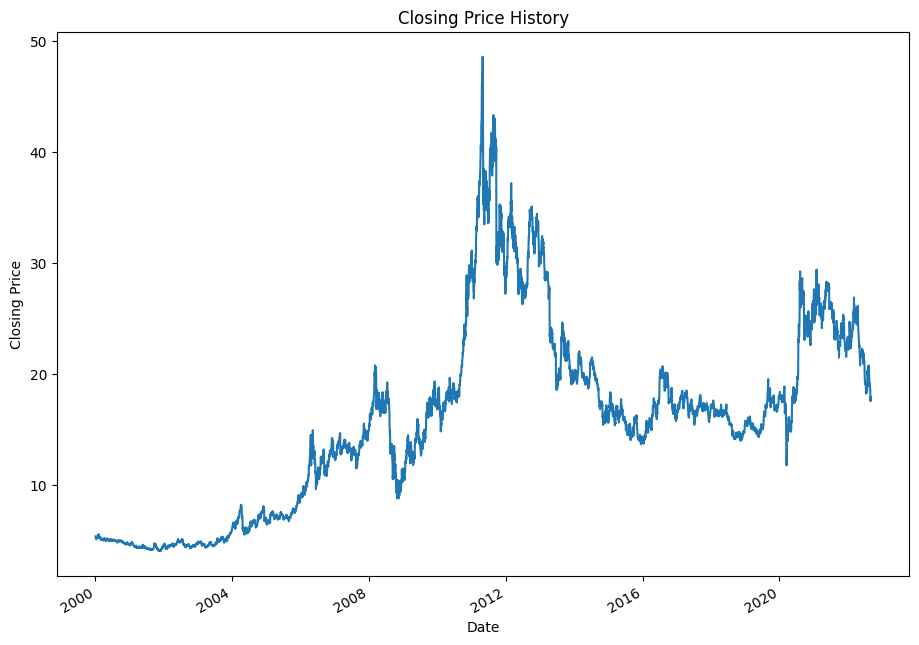

In [ ]:
plt.figure(figsize=(11, 8)) # resizing the plot
train_data['Close'].plot()
plt.title('Closing Price History') # adding a title
plt.xlabel('Date') # x label
plt.ylabel('Closing Price') # y label
plt.show()

Berikut ini merupakan hasil visualisasi data untuk setiap kolom.

Berikut ini merupakan hasil visualisasi data untuk setiap kolom dan diperoleh data stasioner untuk setiap kolom open, close, volume, high, dan low.

<Figure size 1600x800 with 0 Axes>

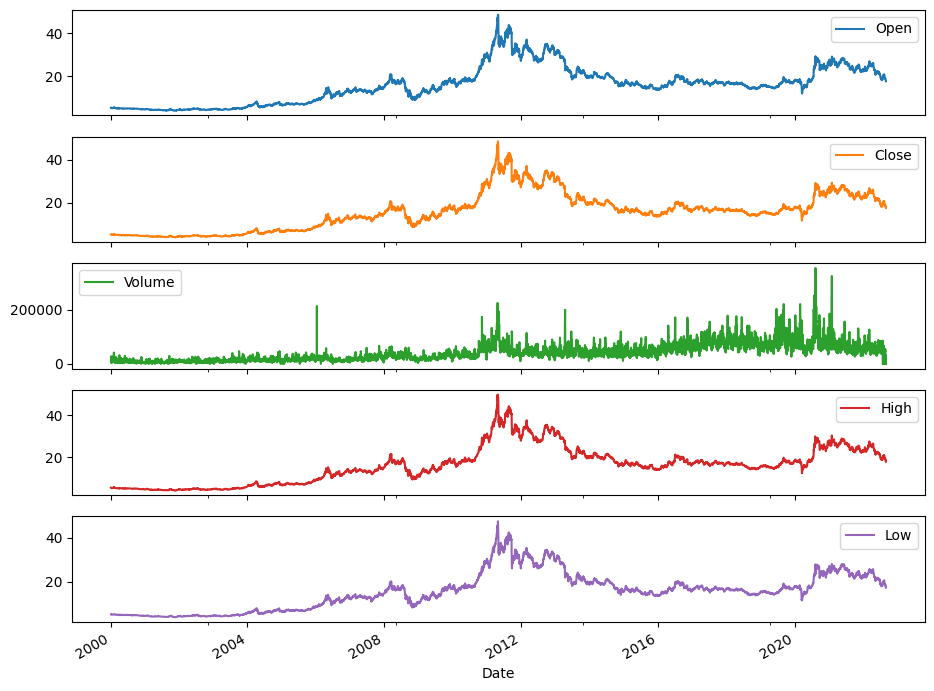

In [ ]:
plt.figure(figsize=(16, 8)) # resizing the plot
cols = ['Open', 'Close', 'Volume', 'High', 'Low']
axes = train_data[cols].plot(figsize=(11, 9), subplots = True)
plt.show()

(Baris 1) Syntax ini berfungsi untuk menghitung presentase perubahan dari kolom 'High' dan 'Low' pada DataFrame 'train_data'. Kemudian disimpan dalam kolom baru yang diberi nama 'HL_PCT'.
(Baris 2) Syntax ini berfungsi untuk menghitung presentase perubahan dari kolom 'Close' dan 'Open' pada DataFrame 'train_data'. Kemudian disimpan dalam kolom baru yang diberi nama 'PCT_change'.

In [ ]:
train_data['HL_PCT'] = (train_data['High'] - train_data['Low']) / train_data['Low'] * 100.0
train_data['PCT_change'] = (train_data['Close'] - train_data['Open']) / train_data['Open'] * 100.0

Syntax di bawah ini berfungsi untuk membuat DataFrame baru dengan fitur tambahan 'HCL_PCT' dan 'PCT_change' dari DataFrame 'train_data'.

In [ ]:
df = train_data[['HL_PCT', 'PCT_change', 'Close','Volume']]

(Baris 1) Syntax ini digunakan untuk menghitung jumlah baris yang akan digunakan dalam peramalan. Pada kasus ini, digunakan 5% data dari DataFrame untuk peramalan. Syntax math.ceil digunakan untuk membulatkan hasil perkalian dan int untuk mengubah tipe data menjadi tipe data integer.
(Baris 2) Syntax ini digunakan untuk menampilkan jumlah baris yang digunakan untuk peramalan, yang dihitung pada langkah sebelumnya.
(Baris 3) Syntax ini digunakan untuk menjadikan acuan close pada DataFrame untuk peramalan.

In [ ]:
forecast_out = int(math.ceil(0.05 * len(df))) # forcasting out 5% of the entire dataset
print(forecast_out)
df['label'] = df['Close'].shift(-forecast_out)

286


<ipython-input-16-e4fd59988e6a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df['Close'].shift(-forecast_out)


(Baris 1) Berfungsi untuk melakukan standarisasi data dengan menghapus mean dan menskalakan varians ke unit yang sama.
(Baris 2) Berfungsi untuk melakukan regresi linier dan regresi ridge.
(Baris 3) Berfungsi untuk melatih model regresi menggunakan algoritma Random Forest.
(Baris 4) Berfungsi untuk melatih model regresi menggunakan metode Support Vector Regression.
(Baris 5) Berfungsi untuk membagi dataset menjadi subset pelatihan dan pengujian.
(Baris 6) Berfungsi untuk menghitung metrik kesalahan regresi berupa mean squared logarithmic error.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error

It’s clear from the plot that there is an fluctuation up and down in the trend,without some seasonality in it.

Dengan adanya banyak data, dilakukan normalisasi data untuk mencegah adanya data bias.
(Baris 1) Syntax ini digunakan untuk melakukan skalasi data.
(Baris 2) Syntax ini berfungsi untuk mengambil fitur-fitur dari dataset 'df' kecuali kolom 'label' dan mengubahnya menjadi array menggunakan NumPy. Variabel 'x' digunakan sebagai input untuk skalasi.
(Baris 3) Syntax ini berfungsi untuk menghitung mean dan standar deviasi dari setiap fitur 'x' yang akan digunakan untuk melakukan skalasi.
(Baris 4) Syntax ini berfungsi untuk melakukan transformasi skalasi pada data 'x' dengan mengubah fitur di 'x' menjadi z-score, yakni dengan mengurangi mean dan membagi dengan standar deviasi dari fitur tersebut. Hasilnya adalah data yang telah dinormalisasi atau diskalakan ke dalam skala yang seragam.

In [ ]:
scaler = StandardScaler()
X = np.array(df.drop(['label'], 1))
scaler.fit(X)
X = scaler.transform(X)

<ipython-input-18-7ce179678b12>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df.drop(['label'], 1))


Melakukan slicing. (Baris 1) syntax ini berfungsi untuk mengambil 'forecast_out' baris akhir dari 'x' dan menyimpannya ke dalam variabel 'X_Predictions'. 'X_Predictions' berisi data yang akan diprediksi.
(Baris 2) Syntax di bawah ini berfungsi untuk mengambil semua baris dari 'x' kecuali 'forecast_out' baris terakhir. Data yang diambil akan digunakan untuk melatih model.

In [ ]:
X_Predictions = X[-forecast_out:] # data to be predicted
X = X[:-forecast_out] # data to be trained

(Baris 1) Syntax ini digunakan untuk menghapus baris-baris yang mengandung nilai yang hilang (NaN) dari dataset 'df' dengan parameter 'inplace = True'.
(Baris 2) Syntax ini digunakan untuk mengambil kolom 'label' dari dataset 'df' dan menyimpannya ke dalam variabel 'y' sebagai variabel dependen dalam proses pelatihan dan evaluasi model.

In [ ]:
df.dropna(inplace=True)
y = np.array(df['label'])

<ipython-input-20-c3da9adb30d1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


Melakukan splitting dengan 2 model LinearRegression dan RandomForestRegressor dan dicari model untuk training dan testing terbaik. Syntax di bawah ini berfungsi untuk membagi dataset 'x' dan 'y' menjadi subset pelatihan ('x_train' dan 'y_train' dan subset pengujian 'X_test' dan 'y_test' dengan menggunakan 20% data dari dataset untuk pengujian sedangkan 80% sisanya untuk pelatihan. Pengaturan 'random_state=42' digunakan untuk memastikan bahwa pembagian dataset menjadi subset pelatihan dan pengujian bersifat deterministik.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

(Baris 1) Syntax di bawah ini berfungsi untuk membuat objek model regresi linier 'ir' menggunakan kelas 'LinearRegresion' dari sckit-learn.
(Baris 2) Syntax ini berfungsi untuk melatih model regresi linier 'ir' dengan menggunakan data pelatihan 'X_train' dan 'y_train' dengan mempelajari hubungan antara fitur-fitur dalam 'X_train' dengan target dalam 'y_train'.
(Baris 3) Syntax ini berfungsi untuk menghitung nilai skor dari model regresi linier menggunakan data pengujian 'x_test' dan 'y_test' untuk memberikan indikasi tentang sejauh mana model dapat menjelaskan variasi dalam data pengujian 'x_test' dan 'y_test'. Nilai skor yang tinggi menunjukkan kinerja model yang lebih baik. kinerja model yang lebih baik.

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_confidence = lr.score(X_test, y_test)

In [ ]:
lr_confidence

0.6038270748943279

(Baris 1) Syntax ini berfungsi untuk membuat objek model RandomForestRegressor 'rf' menggunakan kelas RandomForestRegressor dari sckit-learn. Menggunakan ensamble dari pohon keputusan (decision tree) untuk melakukan regresi.
(Baris 2) Syntax ini berfungsi untuk melatih model RandomForestRegressor 'rf' menggunakan data pelatihan 'x_train' dan 'y_train' untuk mempelajari fitur-fitur dalam 'X_train' dengan nilai target dalam 'y_train' menggunakan ensamble pohon keputusan'.
(Baris 3) (Baris 3) Syntax ini berfungsi untuk menghitung nilai skor dari model RndomForestRegressor 'rf' menggunakan data pengujian 'x_test' dan 'y_test' untuk memberikan indikasi tentang sejauh mana model dapat menjelaskan variasi dalam data pengujian 'x_test' dan 'y_test'. Nilai skor yang tinggi menunjukkan kinerja model yang lebih baik. kinerja model yang lebih baik. Kemudian, diperoleh nilai skor untuk model RandomForestRegressor lebih tinggi dibandingkan model regresi linier.  

In [ ]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_confidence = rf.score(X_test, y_test)

In [ ]:
rf_confidence

0.7406945175736259

Melakukan training.

In [ ]:
last_date = df.index[-1] #getting the lastdate in the dataset
last_unix = last_date.timestamp() #converting it to time in seconds
one_day = 86400 #one day equals 86400 seconds
next_unix = last_unix + one_day # getting the time in seconds for the next day
forecast_set = rf.predict(X_Predictions) # predicting forecast data
df['Forecast'] = np.nan
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += 86400
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]

<ipython-input-26-3eb2aa88d409>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Forecast'] = np.nan
<ipython-input-26-3eb2aa88d409>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)]+[i]
<ipython-input-26-3eb2aa88d409>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[next_date] = [np.nan for _ in range(len

Hasil forecast setelah memplot data ditandai dengan garis secara vertikal warna kuning. Diperoleh data peramalan yang stasioner atau fluktuasi naik dan turun.

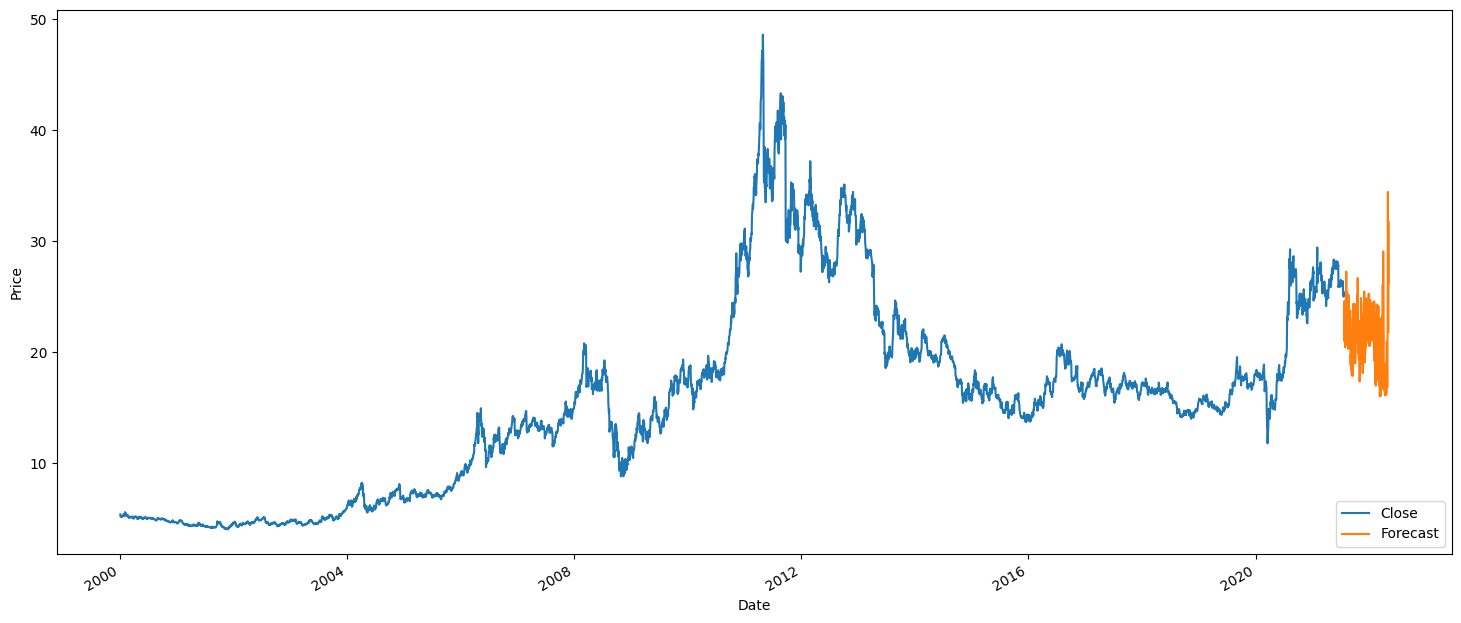

In [ ]:
plt.figure(figsize=(18, 8))
df['Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

## Clustering

<ipython-input-29-2ff176d9cd33>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


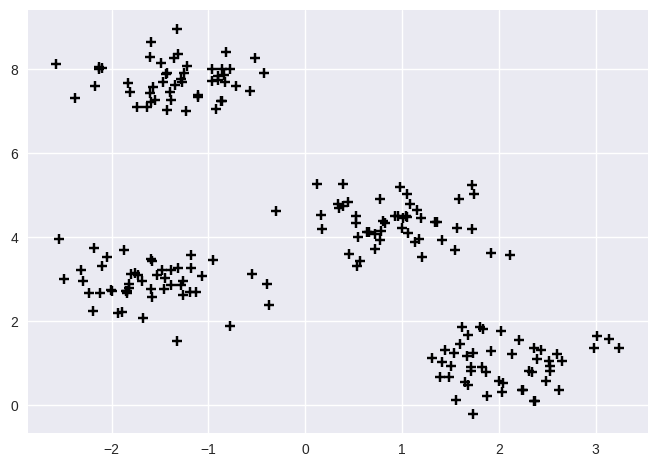

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
plt.style.use('seaborn')
x, y = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=0.5,shuffle=True, random_state=0)
plt.scatter(x[:, 0], x[:, 1], c='k', marker='+', s=50)
plt.show()


In [ ]:
y

array([1, 2, 0, 3, 1, 0, 2, 0, 0, 0, 0, 1, 2, 2, 1, 0, 3, 3, 3, 1, 3, 2,
       1, 2, 1, 1, 3, 1, 1, 0, 3, 0, 2, 1, 2, 0, 2, 0, 0, 3, 3, 3, 3, 0,
       1, 2, 0, 3, 3, 0, 3, 2, 2, 3, 0, 3, 2, 1, 0, 1, 3, 0, 1, 0, 3, 0,
       1, 3, 2, 2, 1, 1, 0, 0, 2, 3, 2, 2, 1, 1, 3, 0, 1, 2, 2, 0, 0, 1,
       2, 2, 3, 3, 3, 0, 0, 1, 2, 3, 0, 0, 3, 1, 1, 3, 3, 2, 0, 1, 1, 0,
       3, 2, 2, 1, 1, 0, 2, 2, 3, 0, 3, 2, 0, 1, 0, 2, 0, 2, 1, 0, 2, 1,
       2, 3, 3, 2, 3, 3, 1, 3, 1, 2, 1, 1, 2, 1, 0, 1, 2, 3, 3, 3, 0, 2,
       1, 0, 3, 2, 3, 1, 3, 1, 1, 2, 2, 3, 0, 1, 1, 2, 1, 0, 2, 3, 3, 3,
       0, 0, 2, 0, 2, 1, 0, 1, 0, 2, 2, 3, 0, 3, 1, 1, 0, 3, 2, 2, 2, 0,
       3, 1])

**1.1 K-means**
1- Randomly select centroids (center of cluster) for each cluster.
2- Calculate the distance of all data points to the centroids.
3- Assign data points to the closest cluster.
4- Find the new centroids of each cluster by taking the mean of all data points in the cluster.
5- Repeat steps 2,3 and 4 until all points converge and cluster centers stop moving

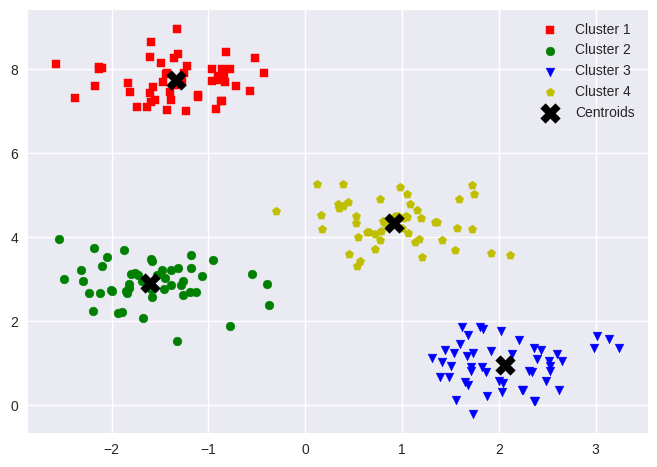

In [ ]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=4, init='random', n_init=10, max_iter=300, tol=1e-04,random_state=0)
y_km = km.fit_predict(x)
plt.scatter(x[y_km==0, 0], x[y_km==0, 1], s=40, c='r', marker='s',label='Cluster 1')
plt.scatter(x[y_km==1, 0], x[y_km==1, 1], s=40, c='g', marker='o',label='Cluster 2')
plt.scatter(x[y_km==2, 0], x[y_km==2, 1], s=40, c='b', marker='v',label='Cluster 3')
plt.scatter(x[y_km==3, 0], x[y_km==3, 1], s=40, c='y', marker='p',label='Cluster 4')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s=200,marker='X', c='k', label='Centroids')
plt.legend(scatterpoints=1)
plt.show()


**The Elbow Method**
Theorem: if k increases, the within-cluster SSE (“distortion”) will decrease.
Inertia is calculated by measuring the distance between each data point and its centroid.

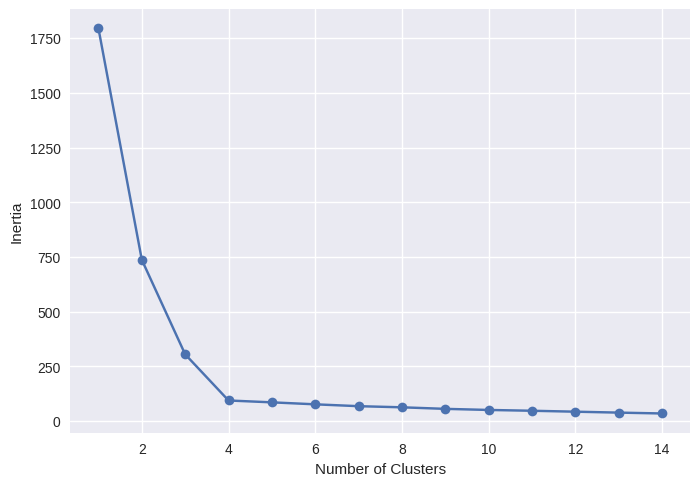

In [ ]:
inertias = []
for i in range(1, 15):
  km = KMeans(n_clusters=i, init='random', n_init=10, max_iter=300, tol=1e-04,random_state=0)
  km.fit(x)
  inertias.append(km.inertia_)

plt.plot(range(1,15), inertias, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


Another example for KMeans

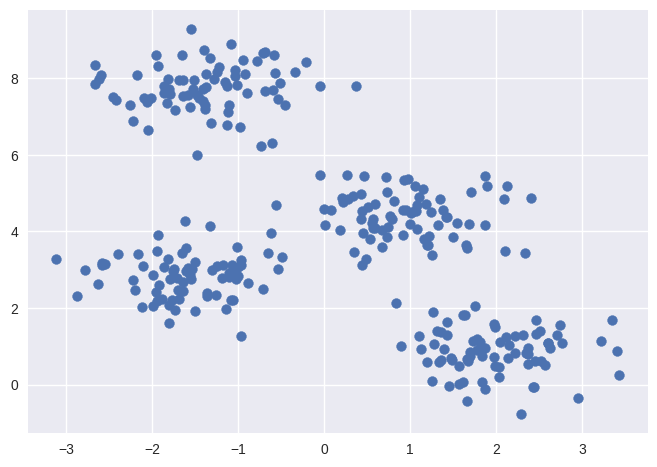

In [ ]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,cluster_std=0.60,
random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

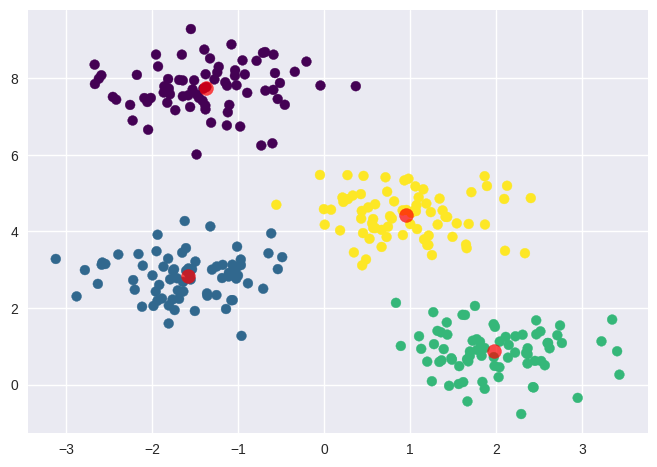

In [ ]:
y_kmeans = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
pusat = kmeans.cluster_centers_
plt.scatter(pusat[:, 0], pusat[:, 1], c='red', s=100, alpha=0.7);

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=6)

In [ ]:
inersia = []
for i in range(1,10):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(X)
  inersia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

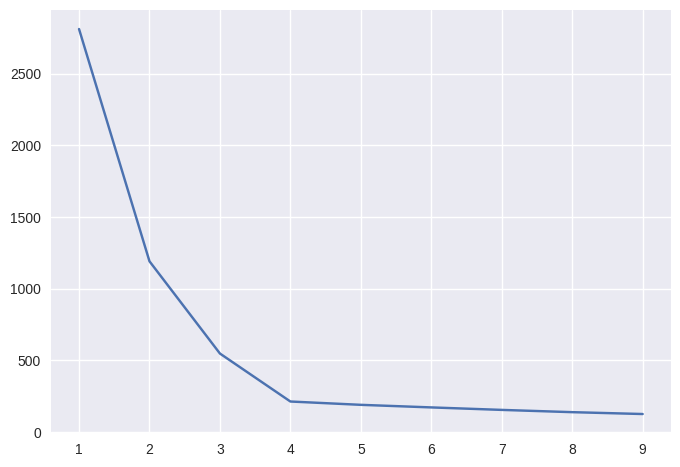

In [ ]:
plt.plot(range(1,10),inersia)
plt.show()

KMean6 with 6 cluster

In [ ]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


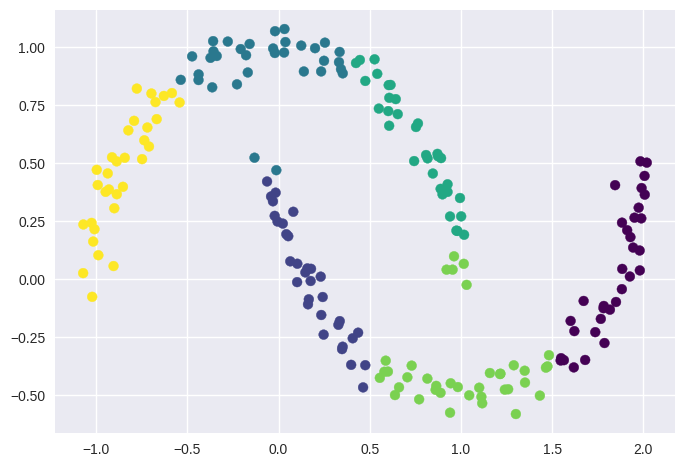

In [ ]:
label = KMeans(6, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=label, s=50, cmap='viridis');

**Spectral Clustering**

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


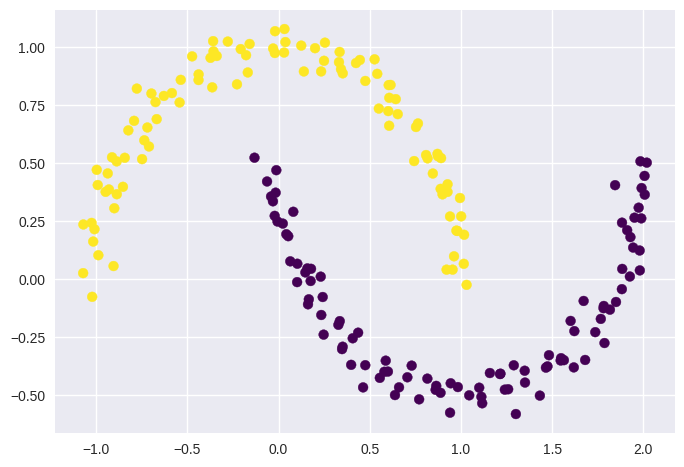

In [ ]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis');

**DBScan**

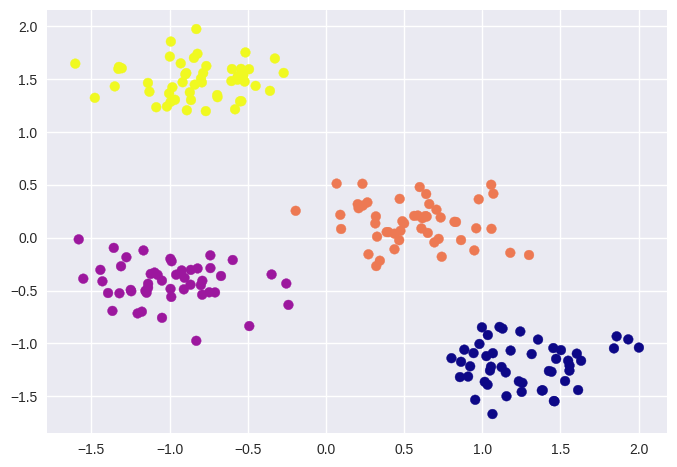

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
newX = scaler.fit_transform(x)
dbscan = DBSCAN(eps=0.35, min_samples=3)
y_db = dbscan.fit_predict(newX)
plt.scatter(newX[:,0], newX[:,1], c=y_db, cmap='plasma')
plt.show()


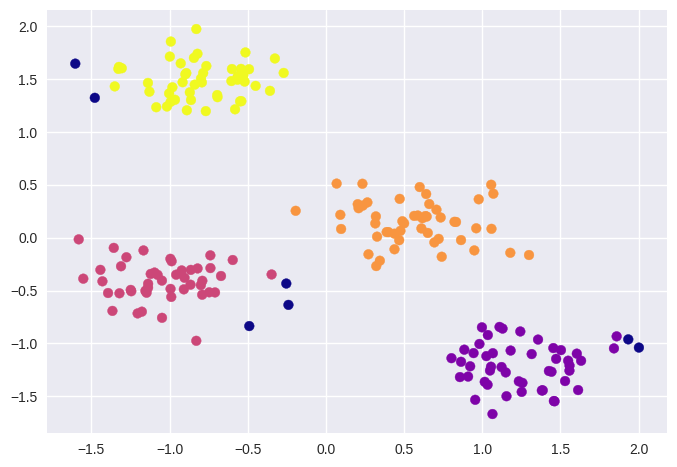

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
newX = scaler.fit_transform(x)
dbscan = DBSCAN(eps=0.35, min_samples=10)
y_db = dbscan.fit_predict(newX)
plt.scatter(newX[:,0], newX[:,1], c=y_db, cmap='plasma')
plt.show()
